In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Hypergeometric result table (computed using up DEGs only): 
filtered_up_df = pd.read_csv("Deleteome_up_DEGs_hypergeometric_results.csv", index_col=0)
filtered_up_df.head() 

,Condition,Knockout Profile,Overlap Count,P-value,Representation Factor,Adjusted P-value BY
0,rpd3KO,ptc1-del vs. wt,36,1.098874e-11,3.517996,4.367207e-10
1,rpd3KO,tlc1-del vs. wt,44,3.088899e-07,2.215924,6.985113e-06
2,rpd3KO,swa2-del vs. wt,40,1.201051e-09,2.810674,3.729565e-08
4,rpd3KO,vps16-del vs. wt,14,1.029318e-04,3.130069,1.633871e-03
5,rpd3KO,sir2-del vs. wt,5,2.372538e-03,4.918680,2.801543e-02


In [3]:
filtered_up_df['Condition']= filtered_up_df['Condition'].astype("category")
filtered_up_df['Condition'].cat.categories

Index(['E6R', 'Sin3KO', 'TSA', 'Ume6KO', 'rpd3KO'], dtype='object')

#### Filtering the data for Condition 'E6R' and ranking by Representation Factor (R.F) & Overlap Count, selecting top 25 in each case

In [4]:
#Filter the dataframe for Condition 'E6R'
e6r_df = filtered_up_df[filtered_up_df['Condition'] == 'E6R']

#Sort by Representation Factor (R.F) & select top 25
ranked_by_rf = e6r_df.sort_values(by='Representation Factor', ascending=False).head(25)

#Sort by Overlap Count & select top 25 
ranked_by_overlap = e6r_df.sort_values(by='Overlap Count', ascending=False).head(25)

#Ranked by Representation Factor (Enrichment score): 
ranked_by_rf[['Knockout Profile', 'Representation Factor', 'Overlap Count']]

,Knockout Profile,Representation Factor,Overlap Count
1307,scs2-del vs. wt,21.065517,2
1211,apn2-del vs. wt,21.065517,3
1132,mms4-del vs. wt,21.065517,2
1339,bik1-del vs. wt,21.065517,2
1249,caf130-del vs. wt,21.065517,2
1302,bsd2-del vs. wt,21.065517,2
1145,dun1-del vs. wt,17.554598,10
1178,mus81-del vs. wt,16.852414,4
1090,shr5-del vs. wt,16.384291,7
1286,rxt3-del vs. wt,15.799138,3


In [5]:
#Rank by #overlapped targets now (but notice the trade-off with effect size or "RF"): 
ranked_by_overlap[['Knockout Profile', 'Representation Factor', 'Overlap Count']].head(5)

,Knockout Profile,Representation Factor,Overlap Count
1326,ssn6-del vs. wt,4.277426,133
1272,opi3-del vs. wt,5.436263,112
1149,tup1-del vs. wt,5.519571,109
1254,ram1-del vs. wt,6.723037,105
1363,cap-del vs. wt,7.833026,103


To rank the E6R targets by significance, we did the following:

1. Filter the data for just the 'E6R' condition

2. Create two separate rankings:

- Top 25 by Representation Factor (R.F.)
- Top 25 by Overlap Count

3. Regarding the agreement between R.F. & Overlap Count (#targets contributing to the overlap): while there's often some correlation, they measure different aspects of enrichment:

- Representation Factor (R.F.) is a measure of the fold enrichment of overlaps compared to what would be expected by chance. It accounts for the background size and is normalized. RF > 1 indicates more overlap than expected from random independent groups. 

- Overlap Count is simply the raw number of targets that overlap, without considering the statistical significance or background. 


It's possible to have:

- High R.F. with low Overlap Count (few overlaps but highly significant)
- High Overlap Count with modest R.F. (many overlaps but less surprising statistically)


Which metric to choose? => The choice depends on your biological question:

1. Use Representation Factor when:

- To identify statistically significant enrichments regardless of absolute size
- To find highly specific biological signals
- Small but highly significant overlaps are relevant to our hypothesis

2. Use Overlap Count when:

- Need a substantial number of overlapping genes for downstream analysis
- The absolute number of shared targets is more important than statistical significance
- Looking for broader biological effects.

3. Why do the rankings differ? 
This divergence is actually expected in many biological datasets. Targets with high RF often have smaller but statistically surprising overlaps, while targets with high Overlap Count might have more modest statistical significance given their size.

4. Options to reconcile the rankings:

- Consider both lists separately for different aspects of analysis
- Create a "composite score" by multiplying or adding normalized versions of both metrics
- Expand to top-25 or 30, but understand this is somewhat arbitrary
- Filter by statistical significance first (using FDR threshold), then rank by R.F or Overlap Count

#### A correlation plot between Representation Factor & Overlap Count is an excellent way to visualize their relationship and identify knockout profiles (targets) with interesting patterns. 

Here’s how we can loop over each condition & create individual scatterplots with annotations for the top points by combined score:


Top 10 points for E6R:
      Knockout Profile  Representation Factor  Overlap Count  combined_score
1267   csm1-del vs. wt              14.745862             21       64.768507
1193   top3-del vs. wt              13.241182             22       59.048147
1217   sis2-del vs. wt              10.922861             42       58.899533
1145   dun1-del vs. wt              17.554598             10       58.315111
1362   gpa2-del vs. wt              13.165948             20       56.902282
1215   slx5-del vs. wt               8.947182             79       56.401074
1143  rpn13-del vs. wt              11.087114             30       54.403257
1135  rad50-del vs. wt              10.532759             34       53.585018
1311   gpr1-del vs. wt              11.128953             28       53.500825
1251   ies2-del vs. wt              11.448651             25       53.165887


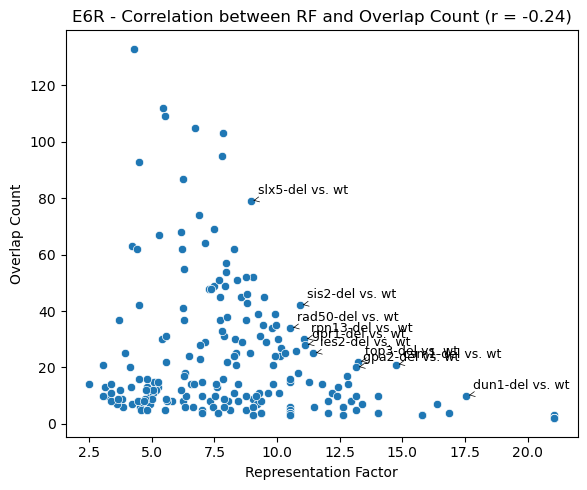


Top 10 points for Sin3KO:
     Knockout Profile  Representation Factor  Overlap Count  combined_score
382   rpd3-del vs. wt              11.895440             86       76.443246
242   sds3-del vs. wt              12.589163             58       73.747079
349   dep1-del vs. wt              12.448716             60       73.533205
451   sin3-del vs. wt              12.268300             60       72.467506
334  sap30-del vs. wt              13.365990             36       69.101166
287   rxt2-del vs. wt              12.344977             21       54.223057
413  pho23-del vs. wt              11.169265             19       47.446227
290   stp3-del vs. wt              10.581409             12       37.933954
321  cdc73-del vs. wt               6.207760             22       27.683080
404   paf1-del vs. wt               5.074126             41       27.184893


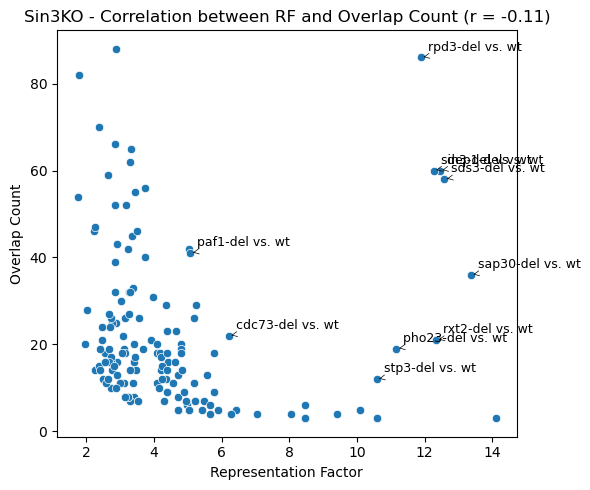


Top 10 points for TSA:
      Knockout Profile  Representation Factor  Overlap Count  combined_score
932    dep1-del vs. wt              12.555033             45       68.950396
975    rpd3-del vs. wt              10.974029             59       64.556294
1062   sin3-del vs. wt              11.823161             43       64.155604
819    sds3-del vs. wt              11.383230             39       60.164948
867    stp3-del vs. wt              15.414790             13       57.041503
919   sap30-del vs. wt              11.982347             24       54.938612
953    hda3-del vs. wt              10.841171             12       38.865192
859    hda2-del vs. wt              10.983818             11       37.997768
868    tup1-del vs. wt               5.381495            118       37.038908
870    slx8-del vs. wt               7.536842             29       36.613834


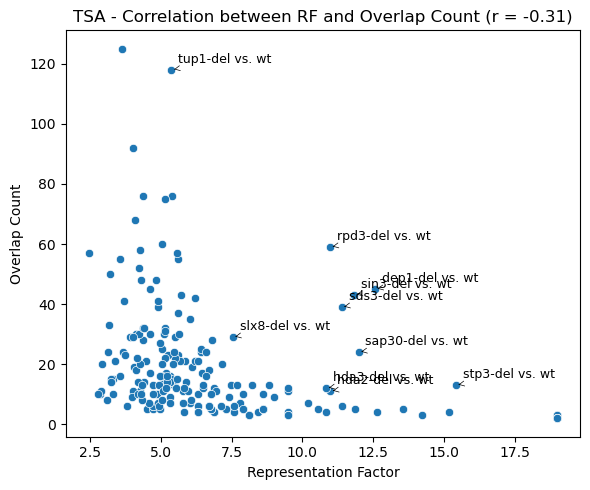


Top 10 points for Ume6KO:
     Knockout Profile  Representation Factor  Overlap Count  combined_score
683   thr1-del vs. wt               6.735963             39       35.602272
631   dep1-del vs. wt               5.829198             51       33.065693
681   rpd3-del vs. wt               5.333907             70       32.693026
488   sds3-del vs. wt               5.739518             48       32.054996
781   sin3-del vs. wt               5.519434             49       30.990022
615  sap30-del vs. wt               6.135998             30       30.108673
675  med15-del vs. wt               4.524154             78       28.436128
464   ptc1-del vs. wt               4.323644             84       27.638104
797    cap-del vs. wt               3.787927            135       26.806459
638   rad6-del vs. wt               4.782932             48       26.712496


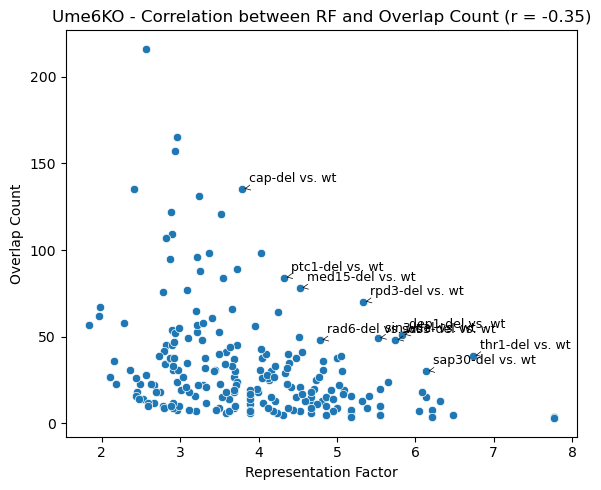


Top 10 points for rpd3KO:
     Knockout Profile  Representation Factor  Overlap Count  combined_score
149   rpd3-del vs. wt              12.007365             83       76.547424
13    sds3-del vs. wt              12.712895             56       73.828292
117   dep1-del vs. wt              12.586033             58       73.728742
216   sin3-del vs. wt              12.403627             58       72.660209
102  sap30-del vs. wt              13.979405             36       72.272476
57    rxt2-del vs. wt              12.911534             21       56.711555
179  pho23-del vs. wt              11.681864             19       49.623711
60    stp3-del vs. wt              11.067029             12       39.674884
88   cdc73-del vs. wt               6.787778             23       30.704933
151   ctr9-del vs. wt               5.502252             44       30.039167


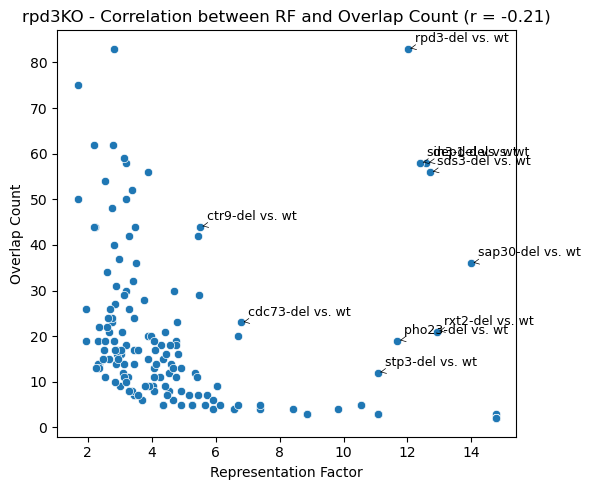

In [6]:
#Grab all our conditions 
conditions = filtered_up_df['Condition'].cat.categories

for cond in conditions:
    #Filter data for the current condition
    cond_df = filtered_up_df[filtered_up_df['Condition'] == cond].copy()
    
    #Calculate correlation coefficient for this condition
    correlation = cond_df['Representation Factor'].corr(cond_df['Overlap Count'])
    
    #Calculate combined score for annotation
    cond_df['combined_score'] = cond_df['Representation Factor'] * np.log2(cond_df['Overlap Count'])
    
    #Select top 10 points by combined score for annotation
    top_points = cond_df.nlargest(10, 'combined_score')

    print(f"\nTop 10 points for {cond}:")
    print(top_points[['Knockout Profile', 'Representation Factor', 'Overlap Count', 'combined_score']])
    
    #Create scatter plot
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=cond_df, x='Representation Factor', y='Overlap Count')
    
    plt.title(f'{cond} - Correlation between RF and Overlap Count (r = {correlation:.2f})')
    plt.xlabel('Representation Factor')
    plt.ylabel('Overlap Count')
    
    #Annotate top points
    for idx, row in top_points.iterrows():
        plt.annotate(row['Knockout Profile'], 
                     (row['Representation Factor'], row['Overlap Count']),
                     xytext=(5, 5), 
                     textcoords='offset points',
                     fontsize=9,
                     arrowprops=dict(arrowstyle='->', lw=0.5))
    
    plt.tight_layout()
    plt.show()


Now, we will create three filtered DataFrames (filtered_q3_rf, filtered_q3_overlap & filtered_q3_combined) based on the third quartile (Q3) thresholds per condition for:

- Representation Factor (RF)
- Overlap Count
- Combined Score (RF × log2(Overlap Count))

In [7]:
#Step-1: Add the combined score column
filtered_up_df['combined_score'] = filtered_up_df['Representation Factor'] * np.log2(filtered_up_df['Overlap Count'])
filtered_up_df['combined_score'] 

0       18.187775
1       12.097685
2       14.958205
4       11.917283
5       11.420820
          ...    
1359    25.519423
1360    17.975908
1361    45.779041
1362    56.902282
1363    52.375534
Name: combined_score, Length: 985, dtype: float64

In [8]:
#Step-2: Compute Q3 thresholds for each metric grouped by condition
#Group by condition & compute median & Q3 for each metric

#Representation Factor (RF)
thresholds_rf = filtered_up_df.groupby('Condition')['Representation Factor'].agg(['median', lambda x: x.quantile(0.75)]).reset_index()
thresholds_rf.columns = ['Condition', 'Median_RF', 'Q3_RF']

#Overlap Count 
thresholds_overlap = filtered_up_df.groupby('Condition')['Overlap Count'].agg(['median', lambda x: x.quantile(0.75)]).reset_index()
thresholds_overlap.columns = ['Condition', 'Median_Overlap', 'Q3_Overlap']

#Combined Score (RF × log2(Overlap Count)) 
thresholds_combined = filtered_up_df.groupby('Condition')['combined_score'].agg(['median', lambda x: x.quantile(0.75)]).reset_index()
thresholds_combined.columns = ['Condition', 'Median_Combined', 'Q3_Combined']

print("RF thresholds:\n", thresholds_rf)
print("\nOverlap Count thresholds:\n", thresholds_overlap) 
print("\nCombined Score thresholds:\n", thresholds_combined)

RF thresholds:
   Condition  Median_RF      Q3_RF
0       E6R   7.997633  10.532759
1    Sin3KO   3.937229   5.168165
2       TSA   5.574262   7.423846
3    Ume6KO   3.886132   4.710463
4    rpd3KO   4.024374   5.494236

Overlap Count thresholds:
   Condition  Median_Overlap  Q3_Overlap
0       E6R            13.0        30.0
1    Sin3KO            16.0        26.0
2       TSA            13.0        24.0
3    Ume6KO            21.0        38.0
4    rpd3KO            14.0        23.5

Combined Score thresholds:
   Condition  Median_Combined  Q3_Combined
0       E6R        28.383775    42.145932
1    Sin3KO        14.569575    18.084224
2       TSA        20.237777    25.953321
3    Ume6KO        16.431322    19.913981
4    rpd3KO        14.647870    17.611440


/tmp/ipykernel_206344/1453048246.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  thresholds_rf = filtered_up_df.groupby('Condition')['Representation Factor'].agg(['median', lambda x: x.quantile(0.75)]).reset_index()
/tmp/ipykernel_206344/1453048246.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  thresholds_overlap = filtered_up_df.groupby('Condition')['Overlap Count'].agg(['median', lambda x: x.quantile(0.75)]).reset_index()
/tmp/ipykernel_206344/1453048246.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

In [9]:
#Step 3: Define a generic filtering function that works for any metric & threshold type
def filter_by_metric_threshold(df, thresholds, metric_col, thresh_col_name):
    """
    Filters df by condition-specific threshold for a given metric,
    and sorts results within each condition by that metric (descending).
    """
    result = []
    
    for _, row in thresholds.iterrows():
        condition = row['Condition']
        thresh = row[thresh_col_name]
        filtered = df[(df['Condition'] == condition) & (df[metric_col] >= thresh)]
        
        #Sort within condition by the metric, descending
        filtered = filtered.sort_values(by=metric_col, ascending=False)
        result.append(filtered)
    return pd.concat(result) if result else pd.DataFrame()

#Step 4: Apply filtering for each metric using Q3 thresholds
filtered_q3_rf = filter_by_metric_threshold(filtered_up_df, thresholds_rf, 
                                           metric_col= 'Representation Factor', 
                                           thresh_col_name='Q3_RF')

filtered_q3_overlap = filter_by_metric_threshold(filtered_up_df, thresholds_overlap, 
                                               metric_col= 'Overlap Count', 
                                               thresh_col_name='Q3_Overlap')

filtered_q3_combined = filter_by_metric_threshold(filtered_up_df, thresholds_combined, 
                                                metric_col= 'combined_score', 
                                                thresh_col_name='Q3_Combined')

#Step 5: Summary of retained knockout profiles per condition
print("\nTargets retained per condition (Q3 RF filter):")
print(filtered_q3_rf.groupby('Condition')['Knockout Profile'].nunique())

print("\nTargets retained per condition (Q3 Overlap Count filter):")
print(filtered_q3_overlap.groupby('Condition')['Knockout Profile'].nunique())

print("\nTargets retained per condition (Q3 Combined Score filter):")
print(filtered_q3_combined.groupby('Condition')['Knockout Profile'].nunique())



Targets retained per condition (Q3 RF filter):
Condition
E6R       55
Sin3KO    40
TSA       52
Ume6KO    61
rpd3KO    41
Name: Knockout Profile, dtype: int64

Targets retained per condition (Q3 Overlap Count filter):
Condition
E6R       56
Sin3KO    42
TSA       54
Ume6KO    67
rpd3KO    41
Name: Knockout Profile, dtype: int64

Targets retained per condition (Q3 Combined Score filter):
Condition
E6R       54
Sin3KO    40
TSA       52
Ume6KO    61
rpd3KO    41
Name: Knockout Profile, dtype: int64


/tmp/ipykernel_206344/3920011883.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(filtered_q3_rf.groupby('Condition')['Knockout Profile'].nunique())
/tmp/ipykernel_206344/3920011883.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(filtered_q3_overlap.groupby('Condition')['Knockout Profile'].nunique())
/tmp/ipykernel_206344/3920011883.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(filtered_

In [10]:
#E6R targets based on Representation factor: 
print(filtered_q3_rf[filtered_q3_rf['Condition'] == 'E6R'][['Knockout Profile', 'Representation Factor', 
                                                            'Overlap Count', 'combined_score']].head(5))

#E6R targets based on Overlap counts: 
filtered_q3_overlap[filtered_q3_overlap['Condition'] == 'E6R'][['Knockout Profile', 'Representation Factor', 
                                                                'Overlap Count', 'combined_score']].head(5)

       Knockout Profile  Representation Factor  Overlap Count  combined_score
1249  caf130-del vs. wt              21.065517              2       21.065517
1132    mms4-del vs. wt              21.065517              2       21.065517
1339    bik1-del vs. wt              21.065517              2       21.065517
1302    bsd2-del vs. wt              21.065517              2       21.065517
1211    apn2-del vs. wt              21.065517              3       33.388055


,Knockout Profile,Representation Factor,Overlap Count,combined_score
1326,ssn6-del vs. wt,4.277426,133,30.178446
1272,opi3-del vs. wt,5.436263,112,37.006568
1149,tup1-del vs. wt,5.519571,109,37.357471
1254,ram1-del vs. wt,6.723037,105,45.140124
1363,cap-del vs. wt,7.833026,103,52.375534


In [11]:
#Based on combined score: 
filtered_q3_combined[filtered_q3_combined['Condition'] == 'E6R'][['Knockout Profile', 'Representation Factor', 
                                                                        'Overlap Count', 'combined_score']].head(10) 

,Knockout Profile,Representation Factor,Overlap Count,combined_score
1267,csm1-del vs. wt,14.745862,21,64.768507
1193,top3-del vs. wt,13.241182,22,59.048147
1217,sis2-del vs. wt,10.922861,42,58.899533
1145,dun1-del vs. wt,17.554598,10,58.315111
1362,gpa2-del vs. wt,13.165948,20,56.902282
1215,slx5-del vs. wt,8.947182,79,56.401074
1143,rpn13-del vs. wt,11.087114,30,54.403257
1135,rad50-del vs. wt,10.532759,34,53.585018
1311,gpr1-del vs. wt,11.128953,28,53.500825
1251,ies2-del vs. wt,11.448651,25,53.165887


In [12]:
#TSA targets based on Overlap counts: 
#Doesn't add up- ssn6/tup1/opi3 are shared with E6R but we expect rpd3/sin3KO to be in the top instead?! 
print(filtered_q3_overlap[filtered_q3_overlap['Condition'] == 'TSA'][['Knockout Profile', 'Representation Factor', 
                                                                      'Overlap Count', 'combined_score']].head(10))

     Knockout Profile  Representation Factor  Overlap Count  combined_score
1036  ssn6-del vs. wt               3.620620            125       25.220459
868   tup1-del vs. wt               5.381495            118       37.038908
985   opi3-del vs. wt               4.021725             92       26.235971
969   ram1-del vs. wt               4.382601             76       27.382174
1056  reg1-del vs. wt               5.400284             76       33.740582
1076   cap-del vs. wt               5.136837             75       31.996424
831   grr1-del vs. wt               4.108597             68       25.010930
1032  cho2-del vs. wt               5.036827             60       29.751988
975   rpd3-del vs. wt              10.974029             59       64.556294
954   cst6-del vs. wt               4.281630             58       25.081707


In [13]:
#TSA filtered by RF: 
print(filtered_q3_rf[filtered_q3_rf['Condition'] == 'TSA'][['Knockout Profile', 'Representation Factor', 
                                                            'Overlap Count', 'combined_score']].head(10))

#TSA filtered by combined score: 
#Recommend sorting by "combined score" as it's best adhered to TSA (QC for which metric to choose?!!) 
filtered_q3_combined[filtered_q3_combined['Condition'] == 'TSA'][['Knockout Profile', 'Representation Factor', 
                                                                        'Overlap Count', 'combined_score']].head(10)

       Knockout Profile  Representation Factor  Overlap Count  combined_score
851    rad23-del vs. wt               18.97205              3       30.069987
847     eug1-del vs. wt               18.97205              2       18.972050
1051    bik1-del vs. wt               18.97205              2       18.972050
921     apn2-del vs. wt               18.97205              3       30.069987
963   caf130-del vs. wt               18.97205              2       18.972050
873     ras2-del vs. wt               18.97205              2       18.972050
981    rad55-del vs. wt               18.97205              2       18.972050
814     rgt2-del vs. wt               18.97205              2       18.972050
807     htz1-del vs. wt               18.97205              2       18.972050
867     stp3-del vs. wt               15.41479             13       57.041503


,Knockout Profile,Representation Factor,Overlap Count,combined_score
932,dep1-del vs. wt,12.555033,45,68.950396
975,rpd3-del vs. wt,10.974029,59,64.556294
1062,sin3-del vs. wt,11.823161,43,64.155604
819,sds3-del vs. wt,11.383230,39,60.164948
867,stp3-del vs. wt,15.414790,13,57.041503
919,sap30-del vs. wt,11.982347,24,54.938612
953,hda3-del vs. wt,10.841171,12,38.865192
859,hda2-del vs. wt,10.983818,11,37.997768
868,tup1-del vs. wt,5.381495,118,37.038908
870,slx8-del vs. wt,7.536842,29,36.613834


In [14]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "Arial" in font:
        print(font)

arial_path = "/usr/share/fonts/truetype/msttcorefonts/Arial.ttf"  # Adjust if needed
arial_font = fm.FontProperties(fname=arial_path)

/usr/share/fonts/truetype/msttcorefonts/Arial_Bold.ttf
/usr/share/fonts/truetype/msttcorefonts/Arial_Italic.ttf
/usr/share/fonts/truetype/msttcorefonts/Arial_Bold_Italic.ttf
/usr/share/fonts/truetype/msttcorefonts/Arial_Black.ttf
/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


In [15]:
from pyvis.network import Network
import networkx as nx

In [16]:
top_30_per_condition = (
    filtered_q3_combined
    .sort_values("combined_score", ascending=False)
    .groupby("Condition")
    .head(30)  #Adjust N here
)

/tmp/ipykernel_206344/2020624890.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Condition")


In [17]:
top_30_per_condition

,Condition,Knockout Profile,Overlap Count,P-value,Representation Factor,Adjusted P-value BY,combined_score
149,rpd3KO,rpd3-del vs. wt,83,1.679933e-81,12.007365,8.946491e-78,76.547424
382,Sin3KO,rpd3-del vs. wt,86,2.194612e-85,11.895440,2.337483e-81,76.443246
13,rpd3KO,sds3-del vs. wt,56,1.679322e-57,12.712895,1.375882e-54,73.828292
242,Sin3KO,sds3-del vs. wt,58,2.305885e-60,12.589163,3.070000e-57,73.747079
117,rpd3KO,dep1-del vs. wt,58,5.033311e-59,12.586033,5.360983e-56,73.728742
...,...,...,...,...,...,...,...
27,rpd3KO,thr4-del vs. wt,12,7.691441e-07,5.365832,1.665073e-05,19.236307
25,rpd3KO,vps41-del vs. wt,9,6.219917e-06,6.036561,1.162252e-04,19.135446
191,rpd3KO,lge1-del vs. wt,9,6.219917e-06,6.036561,1.162252e-04,19.135446
198,rpd3KO,did4-del vs. wt,18,2.272135e-08,4.579460,6.253366e-07,19.096006


In [18]:
top_30_per_condition['log10_FDR'] = -np.log10(top_30_per_condition['Adjusted P-value BY'])
top_30_per_condition['log10_FDR']

149    77.048347
382    80.631252
13     53.861419
242    56.512862
117    55.270756
         ...    
27      4.778567
25      3.934700
191     3.934700
198     6.203886
108    11.505589
Name: log10_FDR, Length: 150, dtype: float64

In [19]:
#Let’s look at the range & spread of -log10(FDR):

print("Min:", top_30_per_condition['log10_FDR'].min())
print("Max:", top_30_per_condition['log10_FDR'].max())
print("Median:", top_30_per_condition['log10_FDR'].median())
print("90th percentile:", top_30_per_condition['log10_FDR'].quantile(0.9))
print("95th percentile:", top_30_per_condition['log10_FDR'].quantile(0.95))

Min: 2.300249993671682
Max: 80.63125152968985
Median: 16.938487167705937
90th percentile: 38.82491701027806
95th percentile: 55.747227211683494


In [20]:
lower_clip = 2
upper_clip = top_30_per_condition['log10_FDR'].quantile(0.95)  
print("Clipping at:", lower_clip, upper_clip)


Clipping at: 2 55.747227211683494


In [21]:
#Apply clipping
top_30_per_condition['log10_FDR_clipped'] = top_30_per_condition['log10_FDR'].clip(lower=lower_clip, upper=upper_clip)
top_30_per_condition['log10_FDR_clipped']

149    55.747227
382    55.747227
13     53.861419
242    55.747227
117    55.270756
         ...    
27      4.778567
25      3.934700
191     3.934700
198     6.203886
108    11.505589
Name: log10_FDR_clipped, Length: 150, dtype: float64

In [22]:
top_30_per_condition.to_csv("Fig4F_E6R_targets_for_cytoscape_06052025.csv")

In [23]:
#Integrated function to build a community network layout from any datafile: 
#Fixed the Arial font-type thing. 

def plot_ko_network(
    filtered_df,
    out_pdf="KO_network.pdf",
    title= "Q3 Combined Score Filtered KO Network"
):
    import networkx as nx
    import matplotlib.colors as mcolors
    from matplotlib.lines import Line2D
    import matplotlib.pyplot as plt
    from matplotlib.colors import LinearSegmentedColormap
    import numpy as np
    import matplotlib.font_manager as fm

    #Load Arial manually
    arial_path = "/usr/share/fonts/truetype/msttcorefonts/Arial.ttf"
    #arial_font = fm.FontProperties(fname=arial_path)

    arial_regular = fm.FontProperties(fname="/usr/share/fonts/truetype/msttcorefonts/Arial.ttf") #Arial.ttf is regular. 
    arial_italic = fm.FontProperties(fname="/usr/share/fonts/truetype/msttcorefonts/Arial_Italic.ttf")
    arial_bold = fm.FontProperties(fname="/usr/share/fonts/truetype/msttcorefonts/Arial_Bold.ttf")
    arial_bold_italic = fm.FontProperties(fname="/usr/share/fonts/truetype/msttcorefonts/Arial_Bold_Italic.ttf")



    #Custom colormap: white (RF/comb_score =0) -> light teal -> medium teal -> Teal 
    custom_cmap = LinearSegmentedColormap.from_list(
        'custom_cmap', ['white', '#b2dfdf', '#33cccc', '#008B8B']
    )

    filtered_df = filtered_df.copy()

    #Replace the "-del vs. wt" with 'Δ' to best represent knockouts. 
    filtered_df['Knockout Profile'] = filtered_df['Knockout Profile'].str.replace(
        r'\s*-del vs\. wt\s*', 'Δ', regex=True)

    edge_tuples = filtered_df[['Condition', 'Knockout Profile', 'Overlap Count']].values

    agg_df = filtered_df.groupby('Knockout Profile').agg({
        'combined_score': 'mean',
        'Adjusted P-value BY': 'min'
    }).reset_index()
    agg_df.rename(columns={
        'combined_score': 'Mean Combined Score',
        'Adjusted P-value BY': 'Min Adjusted P-value'
    }, inplace=True)

    G = nx.Graph()
    for condition, gene, overlap in edge_tuples:
        G.add_node(condition, type='condition')
        G.add_node(gene, type='gene')
        G.add_edge(condition, gene, weight=overlap)

    try:
        from networkx.drawing.nx_agraph import graphviz_layout
        pos = graphviz_layout(G, prog='fdp')
    except ImportError:
        pos = nx.spring_layout(G, seed=42, iterations=500, k=2.5)

    vmin = 0
    vmax = agg_df['Mean Combined Score'].max()
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap = custom_cmap

    condition_nodes = [n for n in G.nodes() if G.nodes[n]['type'] == 'condition']
    gene_nodes = [n for n in G.nodes() if G.nodes[n]['type'] == 'gene']

    gene_colors = []
    for node in gene_nodes:
        val = agg_df.loc[agg_df['Knockout Profile'] == node, 'Mean Combined Score'].values
        gene_colors.append(cmap(norm(val[0])) if len(val) > 0 else 'lightgrey')

    gene_sizes = []
    for node in gene_nodes:
        pval = agg_df.loc[agg_df['Knockout Profile'] == node, 'Min Adjusted P-value'].values
        if len(pval) > 0:
            logval = -np.log10(pval[0])
            size = np.clip(logval, 1, 10) * 250
        else:
            size = 300
        gene_sizes.append(size)

    node_sizes = [3000 if n in condition_nodes else gene_sizes[gene_nodes.index(n)] for n in G.nodes()]
    scaled_gene_node_sizes = [node_sizes[list(G.nodes()).index(n)] * 1.1 for n in gene_nodes]

    edges = G.edges(data=True)
    overlap_counts = [edata['weight'] for _, _, edata in edges]
    if overlap_counts:
        min_w, max_w = min(overlap_counts), max(overlap_counts)
        edge_widths = [1 + 7 * (w - min_w) / (max_w - min_w) if max_w > min_w else 4 for w in overlap_counts]
    else:
        edge_widths = 1

    fig, ax = plt.subplots(figsize=(55, 40))

    nx.draw_networkx_nodes(
        G, pos,
        nodelist=gene_nodes,
        node_color=gene_colors,
        node_size=scaled_gene_node_sizes,
        node_shape='o',
        edgecolors='black',
        linewidths=0.3,
        ax=ax
    )

    nx.draw_networkx_nodes(
        G, pos,
        nodelist=condition_nodes,
        node_color='#FFC300',
        node_size=6000,
        node_shape='s',
        edgecolors='black',
        linewidths=0.7,
        ax=ax
    )

    nx.draw_networkx_edges(
        G, pos,
        width=edge_widths,
        alpha=0.5,
        ax=ax
    )

    #Use arial_font explicitly below

    for n in gene_nodes:
        x, y = pos[n]
        ax.text(
            x, y,
            n,
            fontsize=26,
            fontstyle='italic',
            fontproperties=arial_italic, #For italic gene labels
            ha='center',
            va='center',
            color='black',
            zorder=10
        )

    for n in condition_nodes:
        x, y = pos[n]
        if n in ['E6R', 'TSA']:
            ax.text(
                x, y,
                n,
                fontsize=28,
                fontweight='bold',
                fontproperties=arial_bold, #For bold condition labels (like E6R, TSA) 
                ha='center',
                va='center',
                color='black',
                zorder=10
            )
        else:
            base = n.replace('KO', '').replace('ko', '').replace('Ko', '').replace('kO', '').strip()
            label = f'{base}Δ'
            ax.text(
                x, y,
                label,
                fontsize=26,
                fontstyle='italic',
                fontweight='bold',
                fontproperties=arial_bold_italic, #For bold italic Δ-labels
                ha='center',
                va='center',
                color='black',
                zorder=10
            )

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.025, pad=0.01)
    cbar.set_label("Mean Combined Score", fontsize=14, labelpad=10)
    tick_vals = np.linspace(vmin, vmax, 5)
    cbar.set_ticks(tick_vals)
    cbar.ax.tick_params(labelsize=14, length=4, width=0.8)

    legend_vals = [1, 2, 3, 5, 10]
    legend_sizes = [v * 200 for v in legend_vals]
    legend_elements = [
        Line2D([0], [0],
               marker='o',
               color='w',
               label=f"{v}",
               markerfacecolor='lightgrey',
               markersize=np.sqrt(legend_sizes[i]),
               markeredgecolor='black')
        for i, v in enumerate(legend_vals)
    ]

    legend1 = ax.legend(handles=legend_elements,
                        title="-log10(adj. p-value)\n(node size = significance)",
                        loc='upper left',
                        bbox_to_anchor=(1.1, 1),
                        labelspacing=3,
                        borderpad=1.2,
                        frameon=False,
                        fontsize=24,
                        title_fontsize=26)
    ax.add_artist(legend1)

    if overlap_counts:
        import matplotlib.patches as mpatches
        example_counts = [min_w, int(np.median(overlap_counts)), max_w]
        example_widths = [1 + 7 * (w - min_w) / (max_w - min_w) if max_w > min_w else 4 for w in example_counts]
        edge_legend = [
            mpatches.FancyArrowPatch((0, 0), (0.5, 0),
                                     connectionstyle="arc3,rad=0",
                                     arrowstyle='-',
                                     linewidth=ew,
                                     color='grey',
                                     label=f"{ec} overlap")
            for ec, ew in zip(example_counts, example_widths)
        ]

        legend2 = ax.legend(handles=edge_legend,
                            title="Edge width = No of overlapped targets",
                            loc='upper left',
                            bbox_to_anchor=(1.1, 0.75),
                            labelspacing=1.8,
                            borderpad=1.2,
                            frameon=False,
                            fontsize=24,
                            title_fontsize=26)

    ax.set_title(title, fontsize=15, pad=12)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(out_pdf, dpi=600, bbox_inches='tight')
    plt.show()


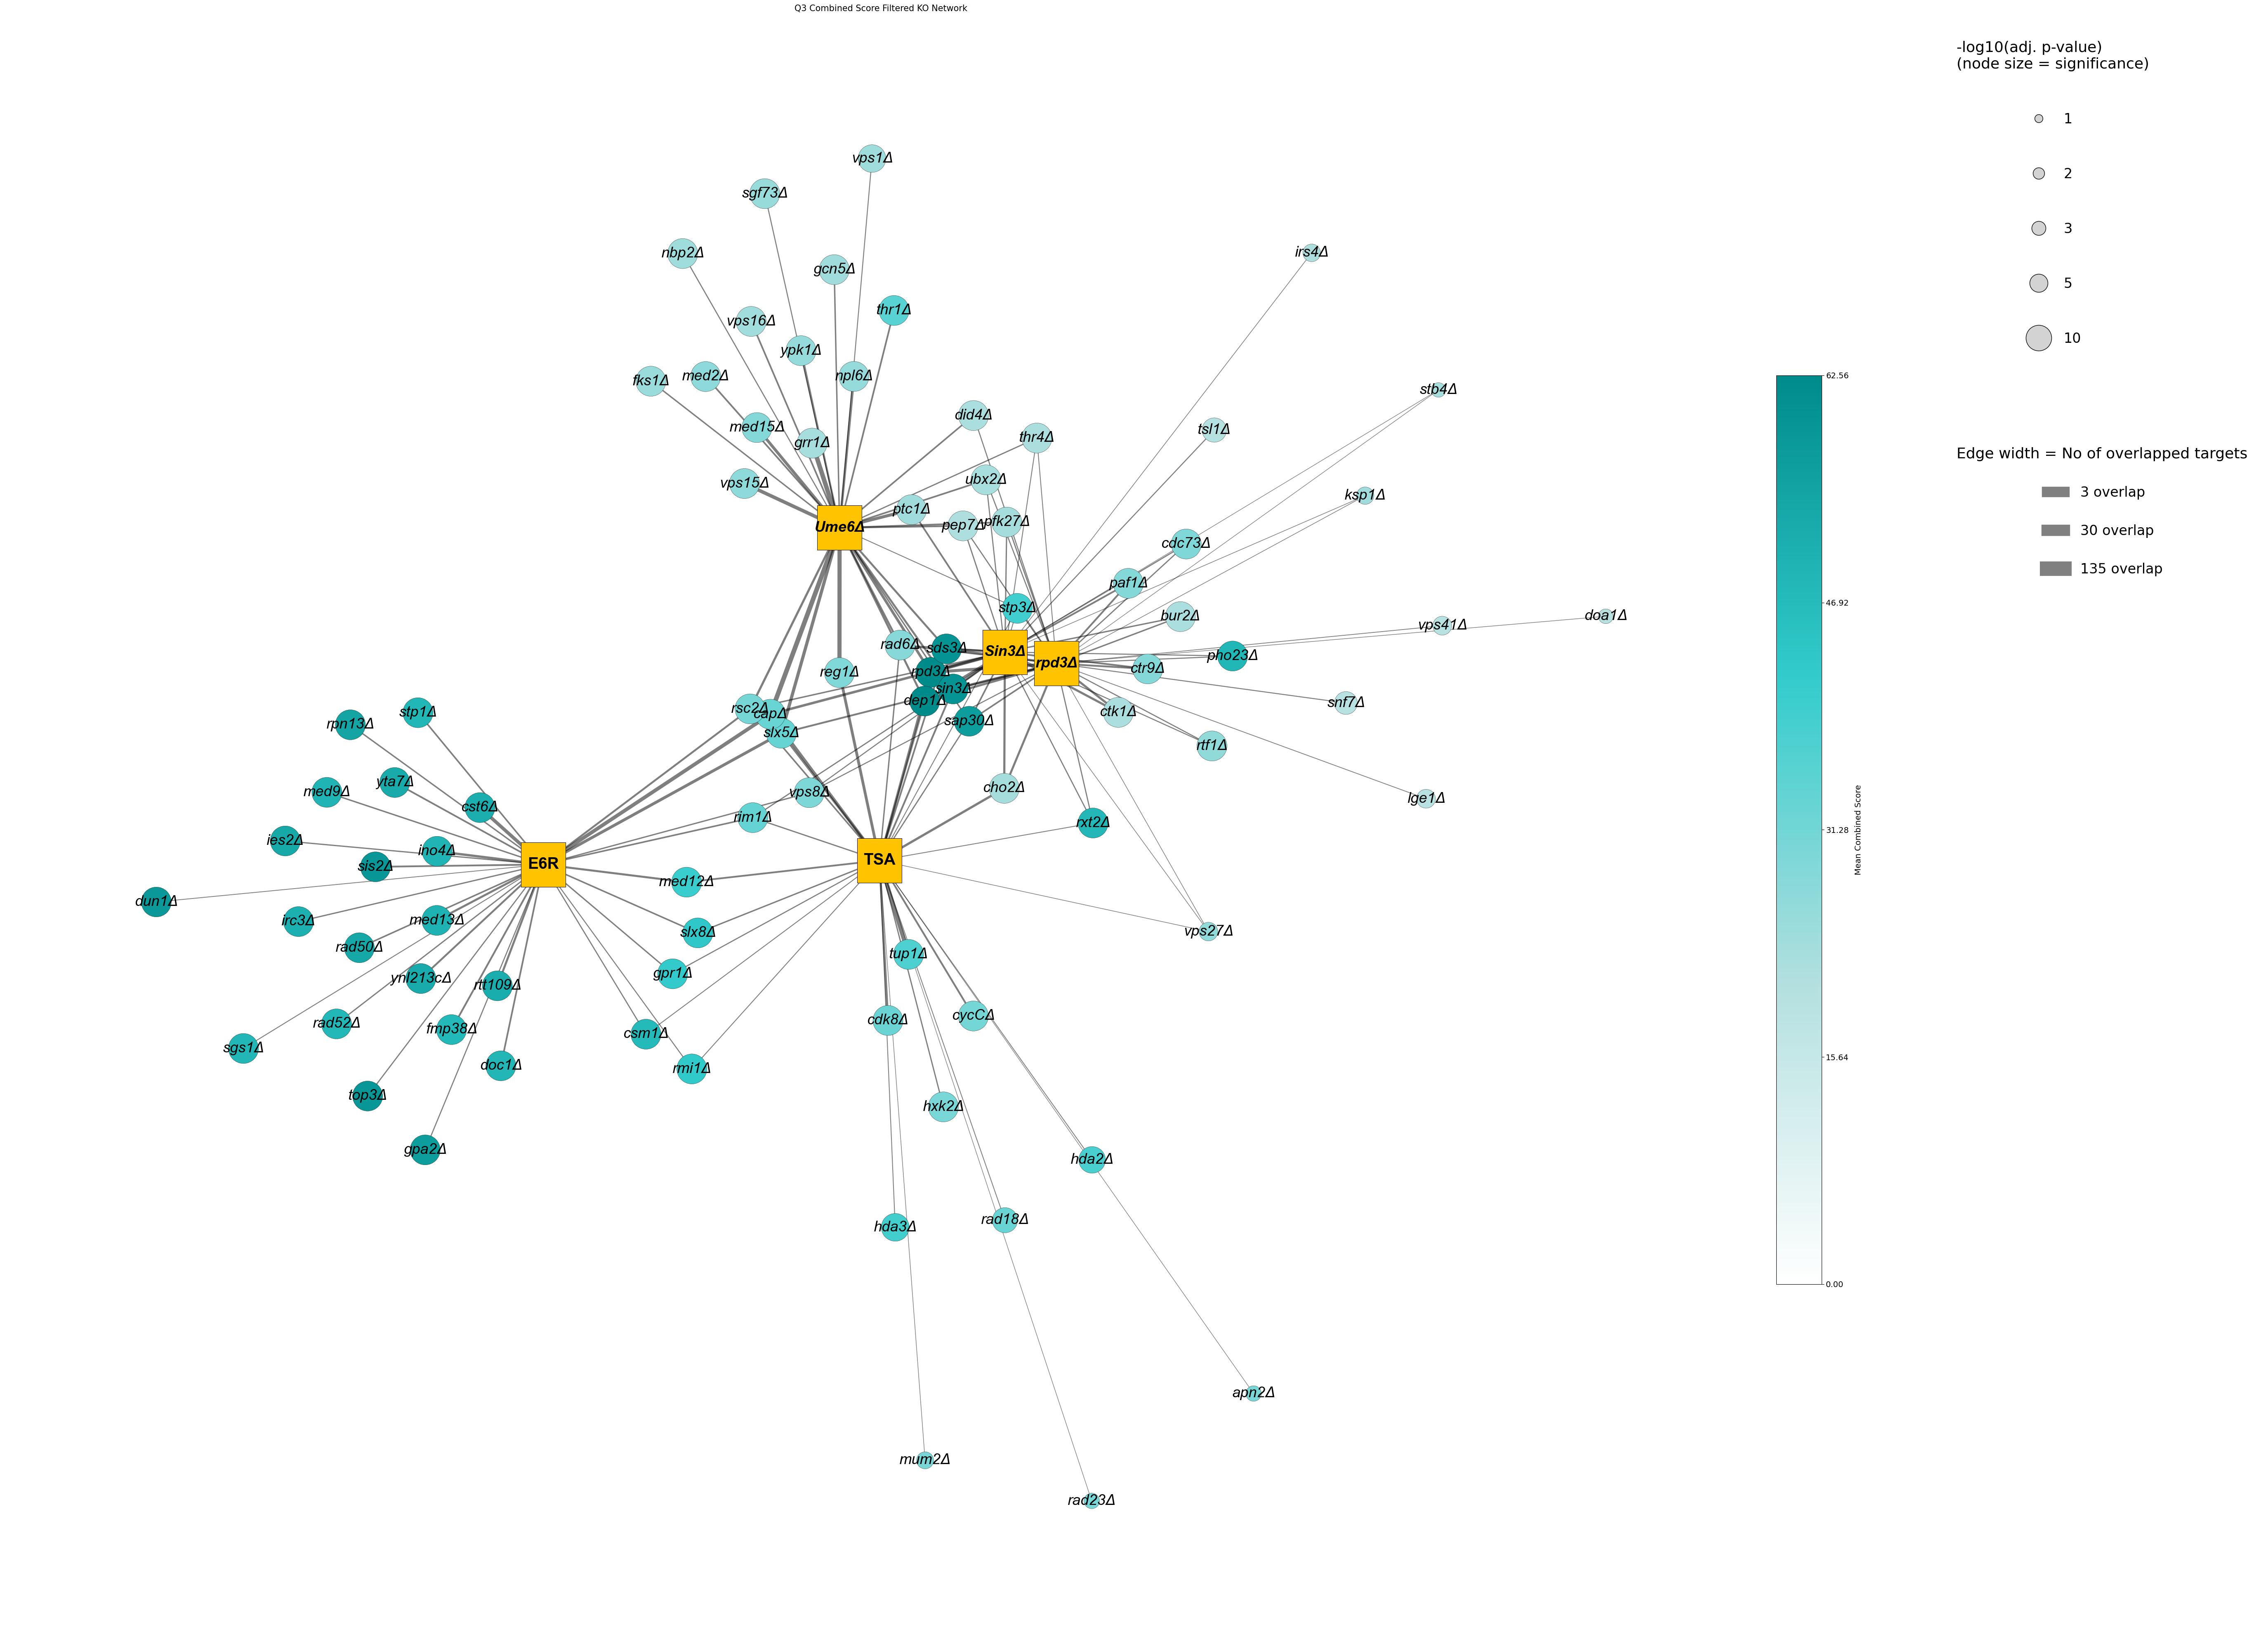

In [24]:
plot_ko_network(top_30_per_condition, out_pdf= "network_combined_top30_06052025.pdf", 
                title="Q3 Combined Score Filtered KO Network")

#Final network drawn using Cytoscape for better visualization & force directed mapping/node positioning 